## Multiplex networks with pymnet

This notebook provides a first (non exaustive) introduction to pymnet.

Refer to the [project documentation](https://mnets.github.io/pymnet/index.html) for a complete overview of the library and its functionalities.

The easiest way to install pymnet is via pip:

pip install pymnet

Start by importing the library:

In [3]:
import pymnet

MultilayerNetwork is the basic network class in the library – all other types of networks are special cases of it. In order to get a monoplex network object, you can simply construct a MultilayerNetwork with 0 aspects.

In [4]:
net = pymnet.MultilayerNetwork(aspects=0)

You can now start adding nodes to the network with the add_node method:

In [5]:
net.add_node(1)
net.add_node(2)

Iterating over the network object will yield all the nodes.

In [6]:
list(net)

[1, 2]

You can access the node objects of the network with the get syntax. The node objects can be used, for example, to get the degree or strength of the node.

In [7]:
net[1].deg()

0

You can now start adding edges to your network. There are two basic ways of doing this. As the first option, you can use syntax which resembles setting elements in an adjacency matrix:

In [8]:
net[1, 2] = 1

As a second option, you can first access a node object and then get the edge pointing to a neighbor of that node:

In [9]:
net[1][2] = 1

These two ways are equivalent, but the difference will become important when we move on to networks that are not monoplex anymore. You can also add edges between nodes that you have not explicitly created, and in this case, the missing nodes are created automatically:

In [10]:
net[1, 3] = 1
list(net)

[1, 2, 3]

You can use similar syntax to check if the edges exist and to access their weights. The default weight value for non-existing edges is 0.

In [11]:
net[1, 2]

1

In [12]:
net[1][3]

1

In [13]:
net[2,3]

0

The network is undirected by default, which means that adding an edge in one direction automatically adds it in both directions.

In [14]:
net[2, 1]

1

The node objects can be iterated, which will yield the list of neighbors of the node:

In [15]:
list(net[1])

[2, 3]

The edges can be removed by simply setting their value to 0:

In [16]:
net[1, 3] = 0
list(net[1])

[2]

The edges of the networks can also be weighted with arbitrary numbers (except with the one corresponding to a missing edge). In weighted networks, the degree and the weighted degree, i.e. strength, of a node are different:

In [17]:
net[1,3] = 2
net[1].deg()

2

In [18]:
net[1].strength()

3

By default, all network objects are undirected. Directed network objects can be created by setting the keyword parameter directed to True in the constructor of the network object:

In [19]:
dirnet = pymnet.MultilayerNetwork(aspects=0, directed=True)
dirnet[1, 2] = 1
dirnet[1, 2]

1

In [20]:
dirnet[2, 1]

0

In [21]:
net[2, 1]

1

## Multilayer networks
We are now ready to move to more general multilayer networks with an arbitrary number of aspects. For simplicity, we will start with a network that has a single aspect.

In [22]:
mnet = pymnet.MultilayerNetwork(aspects=1)

Networks of this type are similar to the monoplex ones, but now you have layers in addition to nodes. You can add new layers with the add_layer method:

In [23]:
mnet.add_node(1)
mnet.add_layer("a")

Now, the node objects of the network need to be accessed by giving both the node and the layer:

In [24]:
mnet[1, "a"].deg()

0

Again, the edges can be accessed in two ways. The first one is similar to the tensor notation, where the indices of nodes and layers are grouped together. The following command will add an edge between node 1 in layer “a” and node 2 in layer “b” (again, the nodes and layers are implicitly created):

In [25]:
mnet[1, 2, "a", "b"] = 1

In the syntax where you first access a node object and then its neighbor, the order of the indices is different. In this syntax, the following command is equivalent to the one shown above:

In [26]:
mnet[1, "a"][2, "b"] = 1

You can again iterate over a node object, but this time, tuples with both node and layer are returned. Note that iterating over the network still returns only the nodes.

In [27]:
list(mnet[1, "a"])

[(2, 'b')]

In [28]:
list(mnet)

[1, 2]

You can create networks with arbitrary number of aspects. The syntax for this type of networks is straight forward extension of the one described above.

In [29]:
mnet2 = pymnet.MultilayerNetwork(aspects=2)
mnet2[1, 2, "a" ,"b", "x" ,"y"] = 1
mnet2[1, "a", "x"][2, "b", "y"]

1

Sometimes new syntax is needed. For example, the aspect must be specified when adding layers.

In [30]:
mnet2.add_layer("c", 1)
mnet2.add_layer("z", 2)

## Multiplex networks
The multilayer networks can in theory be used to represent multiplex networks, but in practice, it is often better to use a specialized class MultiplexNetwork when dealing with multiplex networks. There are several reasons for this. First, the MultiplexNetwork class offers an additional convenient interface for handling intra-layer networks. Second, the MultiplexNetwork class can take coupling rules as an input when it is constructed and use them to implicitly create the inter-layer edges when they are needed. This saves some memory and makes it easier to create networks with such coupling structures. Third, using a MultiplexNetwork will let the functions in the library know that your multilayer network is a multiplex network. Some of the functions only work for multiplex networks, but even the ones that work for general multilayer networks can use the information to speed up the processing.

The simplest multiplex network is the one with no coupling edges. You would create such an object with the following command:

In [31]:
mplex = pymnet.MultiplexNetwork(couplings="none")

The nodes and edges can be accessed and added as usual:

In [32]:
mplex[1, "a"][2, "a"] = 1

The difference to the MultilayerNetwork object (in addition to not being able to add cross-layer links) is that you can now access the intra-layer networks as follows:

In [33]:
mplex.A["a"][1, 2]

1

In [34]:
mplex.A["a"][1, 3] = 1

You can construct MultiplexNetwork objects with given coupling rules and have categorical or ordinal multiplex networks, where the inter-layer edges are filled in automatically. In categorical networks, all the diagonal inter-layer edges are present.

In [35]:
cnet = pymnet.MultiplexNetwork(couplings="categorical")
cnet.add_node(1)
cnet.add_layer("a")
cnet.add_layer("b")
cnet[1, 1, "a", "b"]

1.0

In ordinal networks, only adjacent layers are connected to each other. In a MultiplexNetwork object, the layers of ordinal aspects must be integers.

In [37]:
onet = pymnet.MultiplexNetwork(couplings="ordinal")
onet.add_node("node")
onet.add_layer(1)
onet.add_layer(2)
onet.add_layer(3)
onet["node", "node", 1, 2]

1.0

In [38]:
onet["node", "node", 1, 3]

0

You can also give the coupling strength, i.e. the weight of the inter-layer edges, as a parameter:

In [39]:
cnet = pymnet.MultiplexNetwork(couplings=("categorical", 10))
cnet.add_node(1)
cnet.add_layer("a")
cnet.add_layer("b")
cnet[1, 1, "a", "b"]

10

Multiplex networks with multiple aspects can be constructed by passing a list of coupling rules as the coupling parameter in the constructor. For example, the following code constructs a multiplex network where the first aspect is categorical and the second is ordinal.

In [40]:
conet = pymnet.MultiplexNetwork(couplings=["categorical", "ordinal"])
conet.add_node("node")
conet.add_layer("a", 1)
conet.add_layer("b", 1)
conet.add_layer(1, 2)
conet.add_layer(2, 2)
conet.add_layer(3, 2)
conet["node", "node", "a", "a", 1, 2]

1.0

In this case, the intra-layer network must be accessed by giving a combination of layers.

In [41]:
conet.A[("a", 1)]["node", "node2"] = 1

## Visualizing networks
pymnet can produce high-quality images of multilayer and multiplex networks. The main method for producing network images in the library uses matplotlib as a backend. These images can be saved in both vector formats (such as pdf or svg) and raster formats (such as png). Alternatively, one can produce pictures of networks using a method that uses Javascript and D3 as a backend for displaying figures. These interactive figures can be viewed with any modern browser. (Also, networkx is used for some layouts).

Drawing networks with the library is easy and is usually done with the draw method. Consider, for example, the following code (where the random seeds ensure the reproducibility of the random network model and the spring layout, respectively):

In [42]:
import random
random.seed(42)
import numpy as np
np.random.seed(42)

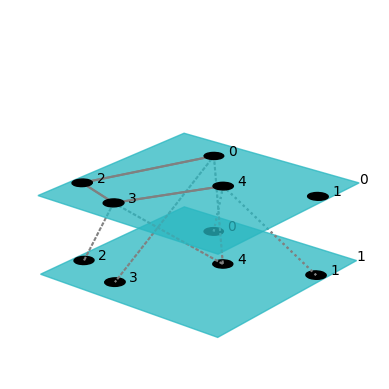

In [43]:
from pymnet import *
net = models.er_multilayer(5, 2, 0.2)
fig = draw(net)

The first line of this code imports pymnet. The second line creates a random node-aligned multilayer network with 5 nodes and 2 layers, where two node-layers are connected to each other with a probability of 0.2. The third line then creates a picture of that network (which is shown directly when working in a Jupyter environment and otherwise can be shown by passing show=True as an argument to the draw function).

You can save the figure to a file, for example, by running fig.savefig("net.pdf").

Multiplex-network figures can also be produced. For example, running the following code produces the following picture of a multiplex Erdos-Renyi network:

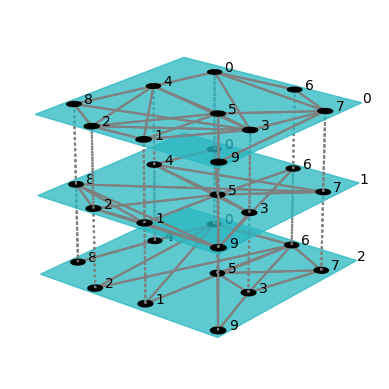

In [44]:
fig = draw(er(10, 3*[0.4]), layout="spring")

There are multiple ways of customizing the figures. For documentation, look at the reference for the draw method. Here is an example usage of the draw method that uses several of the customization options:

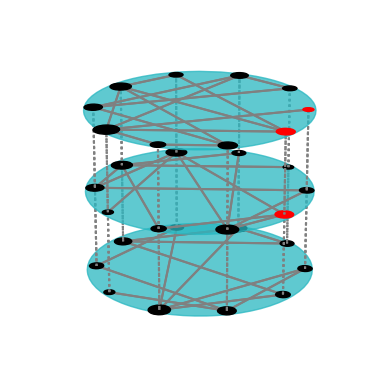

In [45]:
fig = draw(er(10, 3*[0.3]),
           layout="circular",
           layershape="circle",
           nodeColorDict={(0,0):"r", (1,0):"r", (0,1):"r"},
           layerLabelRule={},
           nodeLabelRule={},
           nodeSizeRule={"rule":"degree", "propscale":0.05}
           )

If the network is large, then it is often desirable not to plot the coupling edges. Simply create a network without coupling edges and plot it. For example, we can download the Bernard & Killworth fraternity network.

In [49]:
import requests
dataset = "bkfrat.dat"
fraternity_dataset_url = f"http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/{dataset}"
res = requests.get(fraternity_dataset_url)
with open(dataset, "wb") as f:
    f.write(res.content)

This network might then be plotted like this:

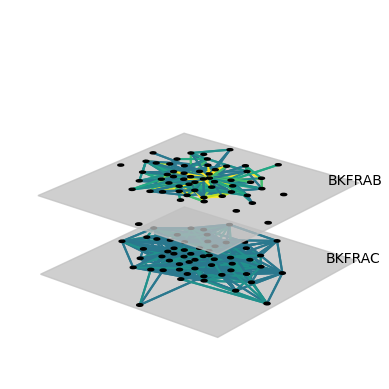

In [50]:
net = read_ucinet(dataset, couplings="none")
net = transforms.threshold(net, 4)
fig = draw(net,
           layout="spring",
           layerColorRule={},
           defaultLayerColor="silver",
           nodeLabelRule={},
           edgeColorRule={"rule":"edgeweight", "colormap":"viridis", "scaleby":0.1},
           defaultLayerLabelLoc=(0.9,0.9)
           )

## Working with real-world data

The Convention on International Trade in Endangered Species of Wild Fauna and Flora (CITES) is an international agreement governing the legal trade in endangered species. Data on trade in endangered species is crucial for monitoring progress toward the United Nations' Sustainable Development Goal 15, and the CITES database makes such data available at a very high granularity, accompanied by great documentation.

To keep matters simple, we analyze an excerpt from the database, which is shipped with this tutorial for convenience and licensed under the [UN Data License](https://data.un.org/Host.aspx?Content=UNdataUse) (see [here](https://github.com/mnets/pymnet/tree/master/doc/tutorials/preprocessing.py) for a documentation of the preprocessing steps).

More precisely, we take a look at the trade in endangered species for two different years (2010 and 2020), focusing on two different trade terms (live specimens and meat), and restricting ourselves to species taken from the wild and traded for commercial purposes.

Our multilayer-network model will be the following:

- Nodes: importing and exporting countries or territories (represented by their ISO-2 codes)
- Aspects:
    - Year (two elementary layers: 2010 and 2020)
    - (Trade) Term (two elementary layers: "live" and "meat")
- Edges: trade volume between countries, measured in number of specimens ("live") or kg ("meat"), where we use the maximum amount reported by any of the trade parties as the edge weight

### Example data
First, we take a look at our data using pandas.
Note that we need to be careful with the NA-handling, since in the ISO-2 country codes, "NA" stands for "Namibia":

In [64]:
import pandas as pd

df = pd.read_csv('data/cites-trades_commercial_live-meat_2010-2020.csv', na_values='null', keep_default_na=False)
df.head()

,Year,Term,Importer,Exporter,Max_reported_quantity,Unit
0,2010,live,AD,ES,26.0,Number of specimens
1,2010,live,AE,AT,74.0,Number of specimens
2,2010,live,AE,BE,609.0,Number of specimens
3,2010,live,AE,BH,2258.0,Number of specimens
4,2010,live,AE,BJ,1912.0,Number of specimens


### Network modeling

Now, let us transform this data into a MultilayerNetwork using pymnet

In [65]:
from pymnet import *

In [80]:
aspect_columns_1 = ["Year", "Term"]
aspect_columns_2 = ["Year", "Term"]
node_columns = ["Exporter", "Importer"]
weight_column = "Max_reported_quantity"
directed = True
fully_interconnected = False

assert len(aspect_columns_1) == len(aspect_columns_2)

net = MultilayerNetwork(aspects=len(aspect_columns_1), directed=directed, fullyInterconnected=fully_interconnected)
for idx, row in df.iterrows():
    a = [row[aspect] for aspect in reversed(aspect_columns_1)]
    b = [row[aspect] for aspect in reversed(aspect_columns_2)]
    net[row[node_columns[0]], a[0], a[1]] [row[node_columns[1]], b[0], b[1]] = row[weight_column]

In [84]:
assert len(net.edges) == len(df)
len(net.edges)

3378

### Network visualization
Plotting in pymnet currently supports only directed networks with a single aspect. Therefore, we first aggregate the bidirectional trade flows between trade partners and create separate networks for each year (2010 and 2020; first aspect).

In [94]:
df["IE"] = [tuple(sorted([x,y])) for x,y in zip(df.Importer,df.Exporter)]
df_undir = df.groupby(["IE","Year"]).agg(dict(Importer="min", Exporter="max",Term="min",Unit="min",Max_reported_quantity="sum")).reset_index()

net2010 = MultiplexNetwork(directed=False, fullyInterconnected=False, couplings="categorical")
net2020 = MultiplexNetwork(directed=False, fullyInterconnected=False, couplings="categorical")

for idx, row in df_undir.query("Exporter != Importer and ((Max_reported_quantity >= 1000000 and Term == 'live') or "
               "(Max_reported_quantity >= 1000 and Term == 'meat'))").iterrows():
    term = row["Term"]
    if row[aspect_columns_1[0]] == 2010:
        a = [row[aspect] for aspect in reversed(aspect_columns_1[1:])]
        b = [row[aspect] for aspect in reversed(aspect_columns_2[1:])]
        net2010[row[node_columns[0]], a[0]
                                   ][row[node_columns[1]], b[0]] = row[weight_column] / (1000 if term == "live" else 1)
    else:
        a = [row[aspect] for aspect in reversed(aspect_columns_1[1:])]
        b = [row[aspect] for aspect in reversed(aspect_columns_2[1:])]
        net2020[row[node_columns[0]], a[0]][row[node_columns[1]], b[0]] = row[weight_column]  / (1000 if term == "live" else 1)

Now, for each year, we can visualize each trade term ("live" and "meat; second aspect) as a separate layer of a single-aspect network. We also ensure that the nodes are aligned across all networks and layers, highlight OECD countries, and do scale nodes by degree as well as edge widths and edge colors by trade flow:

In [95]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import product

In [96]:
def get_width(e):
    weight = e[-1]
    return max(1,min(weight / 1000, 5))

In [97]:
G = nx.Graph()
nodes = sorted(set(df_undir.Importer) | set(df_undir.Exporter))
G.add_nodes_from(nodes)
pos = nx.circular_layout(G)

In [98]:
oecd = ['AU', 'AT', 'BE', 'CA', 'CL', 'CO', 'CR', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE', 'IL', 'IT', 'JP', 'LV',
  'LT', 'LU', 'MX', 'NL', 'NZ', 'NO', 'PL', 'PT', 'SK', 'SI', 'KR', 'ES', 'SE', 'CH', 'TR', 'GB', 'US']

In [99]:
config = dict(layout="circular",
           nodeSizeRule={"rule":"degree", "propscale":0.05},
           nodeColorDict={(x,y):"crimson" for x,y in product(oecd, ["live","meat"])},
           edgeColorRule={"rule":"edgeweight", "colormap":"viridis", "scaleby":5e-5,},
           edgeWidthDict={((e[0],e[2]),(e[1],e[3])):get_width(e) for e in list(net2010.edges) + list(net2020.edges)},
           defaultLayerColor="#DDDDDD",
           defaultLayerLabelLoc=(0.95,0.95), 
           defaultNodeLabelColor="black",
              layergap=1.5, 
              nodeCoords=pos,
              defaultLayerAlpha=0.5
              )

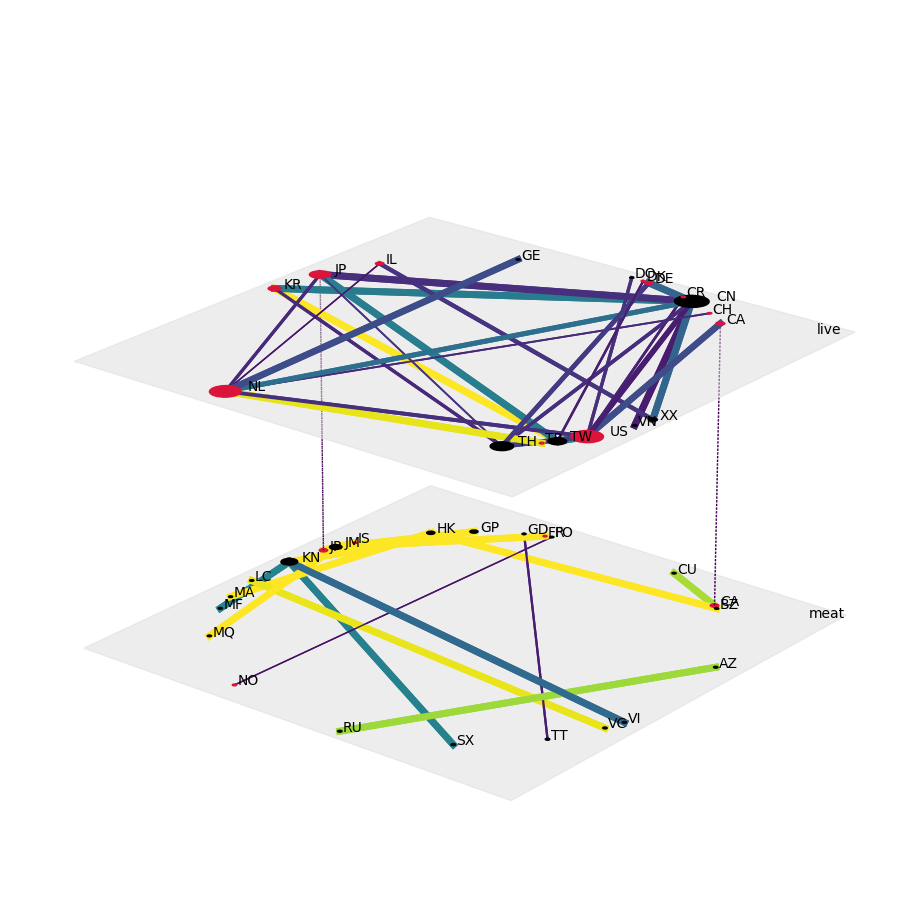

In [100]:
fig, ax = plt.subplots(1,1,figsize=(9,9),subplot_kw=dict(projection='3d'), constrained_layout=True)
draw(net2010, **config, ax=ax)
plt.savefig("img/cites-trades_commercial_live-meat_2010.png", bbox_inches='tight', transparent=True)

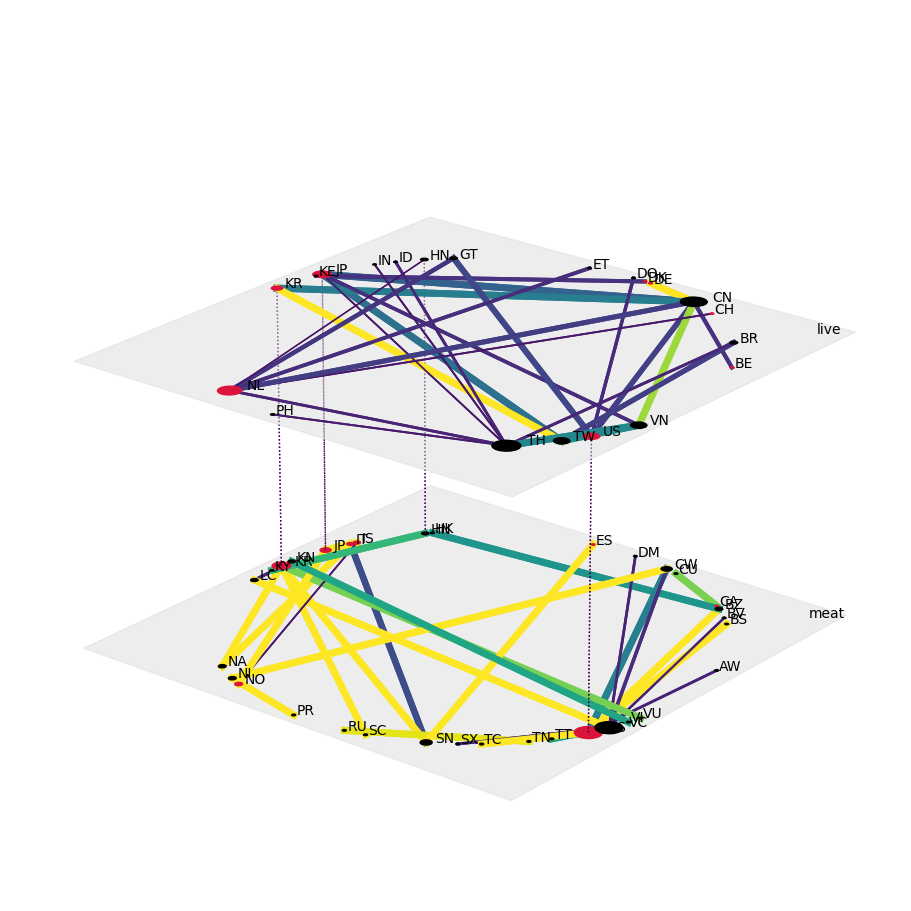

In [101]:
fig, ax = plt.subplots(1,1,figsize=(9,9),subplot_kw=dict(projection='3d'), constrained_layout=True)
draw(net2020, **config, ax=ax)
plt.savefig("img/cites-trades_commercial_live-meat_2020.png", bbox_inches='tight', transparent=True)